In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import seaborn as sns

## Read in data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Ananya_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2018_Top_Songs.csv')
Ananya_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2019_Top_Songs.csv')
Ananya_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2020_Top_Songs.csv')
Ananya_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2021_Top_Songs.csv')
Ananya_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2022_Top_Songs.csv')
Ananya_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ananya_2023_Top_Songs.csv')

Arushi_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2018_Top_Songs.csv')
Arushi_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2019_Top_Songs.csv')
Arushi_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2020_Top_Songs.csv')
Arushi_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2021_Top_Songs.csv')
Arushi_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2022_Top_Songs.csv')
Arushi_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Arushi_2023_Top_Songs.csv')

Ritika_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2018_Top_Songs.csv')
Ritika_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2019_Top_Songs.csv')
Ritika_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2020_Top_Songs.csv')
Ritika_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2021_Top_Songs.csv')
Ritika_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2022_Top_Songs.csv')
Ritika_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Ritika_2023_Top_Songs.csv')

Shriya_df_2018 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2018_Top_Songs.csv')
Shriya_df_2019 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2019_Top_Songs.csv')
Shriya_df_2020 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2020_Top_Songs.csv')
Shriya_df_2021 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2021_Top_Songs.csv')
Shriya_df_2022 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2022_Top_Songs.csv')
Shriya_df_2023 = pd.read_csv(f'/content/drive/MyDrive/MinorProject7/Shriya_2023_Top_Songs.csv')

In [4]:
ananya_df_concat = pd.concat([Ananya_df_2018, Ananya_df_2019, Ananya_df_2020, Ananya_df_2021, Ananya_df_2022, Ananya_df_2023], ignore_index=True, axis=0)
arushi_df_concat = pd.concat([Arushi_df_2018, Arushi_df_2019, Arushi_df_2020, Arushi_df_2021, Arushi_df_2022, Arushi_df_2023], ignore_index=True, axis=0)
ritika_df_concat = pd.concat([Ritika_df_2018, Ritika_df_2019, Ritika_df_2020, Ritika_df_2021, Ritika_df_2022, Ritika_df_2023], ignore_index=True, axis=0)
shriya_df_concat = pd.concat([Shriya_df_2018, Shriya_df_2019, Shriya_df_2020, Shriya_df_2021, Shriya_df_2022, Shriya_df_2023], ignore_index=True, axis=0)
all_df_concat = pd.concat([ananya_df_concat, arushi_df_concat, ritika_df_concat, shriya_df_concat], ignore_index=True, axis=0)

## Prepare data for machine learning models

### Convert numeric variables to scale of [0,1]

In [5]:
# Funtion also used in "01_Data_Visualization.ipynb"
# Create function to do linear transformation on variable to change value to [0,1]
def convert_scale(df, col):
    df[col + '_old'] = df[col]
    new_max = 1
    new_min = 0
    new_range = new_max-new_min
    max_val = df[col].max()
    min_val=df[col].min()
    val_range = max_val - min_val
    df[col]=df[col].apply(lambda x: (((x-min_val)*new_range)/val_range)+new_min)
    return

In [6]:
numeric_cols = ['length',
                'popularity',
                'acousticness',
                'danceability',
                'energy',
                'instrumentalness',
                'liveness',
                'loudness',
                'speechiness',
                'valence',
                'tempo',
                'release_year']

for col in numeric_cols:
    convert_scale(all_df_concat, col)

In [7]:
df_all_adj = all_df_concat.copy()
# df_all_adj

### Onehot encode categorical variables

In [8]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df_all_adj[['time_signature', 'mode', 'key']])
onehot = pd.DataFrame(oe_results.toarray(), columns=['time_signature_1', 'time_signature_2',
                                                     'time_signature_3', 'time_signature_4',
                                                     'mode_1', 'mode_2',
                                                     'key_1', 'key_2','key_3','key_4','key_5', 'key_6',
                                                     'key_7', 'key_8','key_9','key_10','key_11', 'key_12'])
df_all_adj = pd.concat([df_all_adj, onehot], axis=1)
# df_all_adj.T

In [9]:
model_feature_cols = ['energy',
    'valence',
    'danceability',
    'liveness',
    'speechiness',
    'instrumentalness',
    'acousticness',
    'loudness',
    'length',
    'popularity',
    'tempo',
    'release_year',
    'time_signature_1',
    'time_signature_2',
    'time_signature_3',
    'time_signature_4',
    'mode_1',
    'mode_2',
    'key_1',
    'key_2',
    'key_3',
    'key_4',
    'key_5',
    'key_6',
    'key_7',
    'key_8',
    'key_9',
    'key_10',
    'key_11',
    'key_12']

model_y_cols = ['name',
                'album',
                'artist']

In [128]:
df_all_adj = df_all_adj[model_feature_cols + model_y_cols]

df_all_adj['true_label'] = ['0'] * 600 + ['1'] * 600 + ['2'] * 600 + ['3'] * 600

ananya_df_concat = df_all_adj.iloc[:600]
arushi_df_concat = df_all_adj.iloc[600:1200].reset_index()
ritika_df_concat = df_all_adj.iloc[1200:1800].reset_index()
shriya_df_concat = df_all_adj.iloc[1800:].reset_index()

### Remove repeated songs

In [11]:
# remove repeats on individual playlists
def remove_repeats(df):
  rows_old = range(len(df))
  rows_new = []
  skips = []
  for i in range(len(df)):
    for j in range(i+1, len(df)):
      if(df['name'][i] == df['name'][j]) and (df['artist'][i] == df['artist'][j]):
        skips.append(j)
  for row in rows_old:
    if not row in skips:
      rows_new.append(row)
  df = df.iloc[rows_new,:].reset_index(drop=True)
  return df

In [12]:
df_ananya_no_repeats = remove_repeats(ananya_df_concat)
df_arushi_no_repeats = remove_repeats(arushi_df_concat)
df_ritika_no_repeats = remove_repeats(ritika_df_concat)
df_shriya_no_repeats = remove_repeats(shriya_df_concat)

print(len(df_ananya_no_repeats),len(df_arushi_no_repeats),len(df_ritika_no_repeats), len(df_shriya_no_repeats))

474 524 554 570


### Remove songs if they have all categories

In [13]:
# remove songs on all playlists (12)
def remove_same_songs(df1, df2, df3, df4):
    rows_old_df1 = range(len(df1))
    rows_new_df1 = []

    rows_old_df2 = range(len(df2))
    rows_new_df2 = []

    rows_old_df3 = range(len(df3))
    rows_new_df3 = []

    rows_old_df4 = range(len(df4))
    rows_new_df4 = []

    same_songs_df1 = []
    same_songs_df2 = []
    same_songs_df3 = []
    same_songs_df4 = []

    # Check for duplicates between df1 and df2
    for i in range(len(df1)):
        for j in range(len(df2)):
            if (df1['name'][i] == df2['name'][j]) and (df1['artist'][i] == df2['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df2.append(j)

    # Check for duplicates between df1 and df3
    for i in range(len(df1)):
        for j in range(len(df3)):
            if (df1['name'][i] == df3['name'][j]) and (df1['artist'][i] == df3['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df3.append(j)
                # Check for duplicates between df1 and df4
    for i in range(len(df1)):
        for j in range(len(df4)):
            if (df1['name'][i] == df4['name'][j]) and (df1['artist'][i] == df4['artist'][j]):
                same_songs_df1.append(i)
                same_songs_df4.append(j)

    # Check for duplicates between df2 and df3
    for i in range(len(df2)):
        for j in range(len(df3)):
            if (df2['name'][i] == df3['name'][j]) and (df2['artist'][i] == df3['artist'][j]):
                same_songs_df2.append(i)
                same_songs_df3.append(j)

    # Check for duplicates between df2 and df4
    for i in range(len(df2)):
        for j in range(len(df4)):
            if (df2['name'][i] == df4['name'][j]) and (df2['artist'][i] == df4['artist'][j]):
                same_songs_df2.append(i)
                same_songs_df4.append(j)

    # Check for duplicates between df3 and df4
    for i in range(len(df3)):
        for j in range(len(df4)):
            if (df3['name'][i] == df4['name'][j]) and (df3['artist'][i] == df4['artist'][j]):
                same_songs_df3.append(i)
                same_songs_df4.append(j)

    for row in rows_old_df1:
        if row not in same_songs_df1:
            rows_new_df1.append(row)

    for row in rows_old_df2:
        if row not in same_songs_df2:
            rows_new_df2.append(row)

    for row in rows_old_df3:
        if row not in same_songs_df3:
            rows_new_df3.append(row)

    for row in rows_old_df4:
        if row not in same_songs_df4:
            rows_new_df4.append(row)

    df1_result = df1.iloc[rows_new_df1, :].reset_index(drop=True)
    df2_result = df2.iloc[rows_new_df2, :].reset_index(drop=True)
    df3_result = df3.iloc[rows_new_df3, :].reset_index(drop=True)
    df4_result = df4.iloc[rows_new_df4, :].reset_index(drop=True)

    return df1_result, df2_result, df3_result, df4_result

df_ananya_no_repeats_no_same, df_arushi_no_repeats_no_same, df_ritika_no_repeats_no_same, df_shriya_no_repeats_no_same = remove_same_songs(
    df_ananya_no_repeats,
    df_arushi_no_repeats,
    df_ritika_no_repeats,
    df_shriya_no_repeats
)

print(len(df_ananya_no_repeats_no_same))
print(len(df_arushi_no_repeats_no_same))
print(len(df_ritika_no_repeats_no_same))
print(len(df_shriya_no_repeats_no_same))

286
367
381
425


### Upsample smaller category so number of samples per class size is equal

In [14]:
# upsample all for same size categories
def add_missing_songs(df, n, state):
    r = np.random.RandomState(seed=state)
    new_samples = r.choice(df.shape[0], size=n, replace=False)
    new_df = pd.concat([df,  df.iloc[new_samples,:]], ignore_index=True, axis=0)
    return new_df

In [15]:
df_ananya_no_repeats_no_same_up_sampled = add_missing_songs(df_ananya_no_repeats_no_same, 139, 42)
df_arushi_no_repeats_no_same_up_sampled = add_missing_songs(df_arushi_no_repeats_no_same, 58, 42)
df_ritika_no_repeats_no_same_up_sampled = add_missing_songs(df_ritika_no_repeats_no_same, 44, 42)

In [16]:
def limit_features(df):
    return df[model_feature_cols]

In [17]:
ananya_features = limit_features(df_ananya_no_repeats_no_same_up_sampled)
arushi_features = limit_features(df_arushi_no_repeats_no_same_up_sampled)
ritika_features = limit_features(df_ritika_no_repeats_no_same_up_sampled)
shriya_features = limit_features(df_shriya_no_repeats_no_same)

### Get training and test sets

In [18]:
def get_train_test(df, n, state):
    r = np.random.RandomState(seed=state)
    new_samples = list(r.choice(df.shape[0], size=n, replace=False))

    train_1 = new_samples[0:336] + new_samples[420:426]
    test_1 = new_samples[336:420]

    train_2 = new_samples[0:252] + new_samples[336:420] + new_samples[420:426]
    test_2 = new_samples[252:336]

    train_3 = new_samples[0:168] + new_samples[252:420] + new_samples[420:426]
    test_3 = new_samples[168:252]

    train_4 = new_samples[0:84] + new_samples[168:420] + new_samples[420:426]
    test_4 = new_samples[84:168]

    train_5 = new_samples[168:420] + new_samples[420:426]
    test_5 = new_samples[0:84]

    return train_1, test_1, train_2, test_2, train_3, test_3, train_4, test_4, train_5, test_5

In [19]:
train_test = get_train_test(df_ananya_no_repeats_no_same_up_sampled,
                            df_ananya_no_repeats_no_same_up_sampled.shape[0],
                            42)

train_1, test_1, train_2, test_2, train_3, test_3, train_4, test_4, train_5, test_5 =\
train_test[0], train_test[1], train_test[2], train_test[3], train_test[4], train_test[5], train_test[6], train_test[7], train_test[8], train_test[9]

In [20]:
ananya_train_1 = ananya_features.iloc[train_1,:]
ananya_train_2 = ananya_features.iloc[train_2,:]
ananya_train_3 = ananya_features.iloc[train_3,:]
ananya_train_4 = ananya_features.iloc[train_4,:]
ananya_train_5 = ananya_features.iloc[train_5,:]

arushi_train_1 = arushi_features.iloc[train_1,:]
arushi_train_2 = arushi_features.iloc[train_2,:]
arushi_train_3 = arushi_features.iloc[train_3,:]
arushi_train_4 = arushi_features.iloc[train_4,:]
arushi_train_5 = arushi_features.iloc[train_5,:]

ritika_train_1 = ritika_features.iloc[train_1,:]
ritika_train_2 = ritika_features.iloc[train_2,:]
ritika_train_3 = ritika_features.iloc[train_3,:]
ritika_train_4 = ritika_features.iloc[train_4,:]
ritika_train_5 = ritika_features.iloc[train_5,:]

shriya_train_1 = shriya_features.iloc[train_1,:]
shriya_train_2 = shriya_features.iloc[train_2,:]
shriya_train_3 = shriya_features.iloc[train_3,:]
shriya_train_4 = shriya_features.iloc[train_4,:]
shriya_train_5 = shriya_features.iloc[train_5,:]

In [21]:
ananya_test_1 = ananya_features.iloc[test_1,:]
ananya_test_2 = ananya_features.iloc[test_2,:]
ananya_test_3 = ananya_features.iloc[test_3,:]
ananya_test_4 = ananya_features.iloc[test_4,:]
ananya_test_5 = ananya_features.iloc[test_5,:]

arushi_test_1 = arushi_features.iloc[test_1,:]
arushi_test_2 = arushi_features.iloc[test_2,:]
arushi_test_3 = arushi_features.iloc[test_3,:]
arushi_test_4 = arushi_features.iloc[test_4,:]
arushi_test_5 = arushi_features.iloc[test_5,:]

ritika_test_1 = ritika_features.iloc[test_1,:]
ritika_test_2 = ritika_features.iloc[test_2,:]
ritika_test_3 = ritika_features.iloc[test_3,:]
ritika_test_4 = ritika_features.iloc[test_4,:]
ritika_test_5 = ritika_features.iloc[test_5,:]

shriya_test_1 = shriya_features.iloc[test_1,:]
shriya_test_2 = shriya_features.iloc[test_2,:]
shriya_test_3 = shriya_features.iloc[test_3,:]
shriya_test_4 = shriya_features.iloc[test_4,:]
shriya_test_5 = shriya_features.iloc[test_5,:]

In [22]:
def get_train_and_test(ananya_train, arushi_train, ritika_train, shriya_train, ananya_test, arushi_test, ritika_test, shriya_test):
    train_X = pd.concat([ananya_train, arushi_train, ritika_train, shriya_train])
    test_X = pd.concat([ananya_test, arushi_test, ritika_test, shriya_test])
    train_y = ([0]*len(ananya_train)) + ([1]*len(arushi_train)) + ([2]*len(ritika_train)) + ([3]*len(shriya_train))
    test_y = ([0]*len(ananya_test)) + ([1]*len(arushi_test)) + ([2]*len(ritika_test)) + ([3]*len(shriya_test))
    return train_X, test_X, train_y, test_y

In [23]:
train_X_1, test_X_1, train_y_1, test_y_1 = get_train_and_test(ananya_train_1,
                                                              arushi_train_1,
                                                              ritika_train_1,
                                                              shriya_train_1,
                                                              ananya_test_1,
                                                              arushi_test_1,
                                                              ritika_test_1,
                                                              shriya_test_1)
train_X_2, test_X_2, train_y_2, test_y_2 = get_train_and_test(ananya_train_2,
                                                              arushi_train_2,
                                                              ritika_train_2,
                                                              shriya_train_2,
                                                              ananya_test_2,
                                                              arushi_test_2,
                                                              ritika_test_2,
                                                              shriya_test_2)
train_X_3, test_X_3, train_y_3, test_y_3 = get_train_and_test(ananya_train_3,
                                                              arushi_train_3,
                                                              ritika_train_3,
                                                              shriya_train_3,
                                                              ananya_test_3,
                                                              arushi_test_3,
                                                              ritika_test_3,
                                                              shriya_test_3)
train_X_4, test_X_4, train_y_4, test_y_4 = get_train_and_test(ananya_train_4,
                                                              arushi_train_4,
                                                              ritika_train_4,
                                                              shriya_train_4,
                                                              ananya_test_4,
                                                              arushi_test_4,
                                                              ritika_test_4,
                                                              shriya_test_4)
train_X_5, test_X_5, train_y_5, test_y_5 = get_train_and_test(ananya_train_5,
                                                              arushi_train_5,
                                                              ritika_train_5,
                                                              shriya_train_5,
                                                              ananya_test_5,
                                                              arushi_test_5,
                                                              ritika_test_5,
                                                              shriya_test_5)

### Evaluation functions

In [24]:
def accuracy(conf_matrix):
    # Assuming conf_matrix is a 4x4 confusion matrix
    num_classes = len(conf_matrix)
    total_correct = sum(conf_matrix[i][i] for i in range(num_classes))
    total_predictions = sum(sum(conf_matrix[i]) for i in range(num_classes))
    return total_correct / total_predictions

In [25]:
def precision(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    return tp / (tp + fp)

In [26]:
def recall(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fn = sum(conf_matrix[class_index][i] for i in range(len(conf_matrix)) if i != class_index)
    return tp / (tp + fn)

In [27]:
def specificity(conf_matrix, class_index):
    # Calculate true negatives (TN) for the specified class
    tn = sum(conf_matrix[i][j] for i in range(len(conf_matrix)) for j in range(len(conf_matrix)) if i != class_index and j != class_index)
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    return tn / (tn + fp)

In [28]:
def f1(conf_matrix, class_index):
    tp = conf_matrix[class_index][class_index]
    fp = sum(conf_matrix[i][class_index] for i in range(len(conf_matrix)) if i != class_index)
    fn = sum(conf_matrix[class_index][i] for i in range(len(conf_matrix)) if i != class_index)
    precision_ = tp / (tp + fp)
    recall_ = tp / (tp + fn)
    return 2 * precision_ * recall_ / (precision_ + recall_)

In [29]:
def plot_roc_multiclass(title, y_true, y_scores, n_classes, save=False):
    plt.figure(figsize=(8, 6))
    plt.title(title)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    if save:
        plt.savefig(save, bbox_inches='tight')

    plt.show()

In [30]:
def plot_pr_curve(y_test, y_score, title='', save=False):
    # Assuming you have four classes, adjust the plotting accordingly
    precision, recall, thresholds = [], [], []
    for i in range(4):
        precision_i, recall_i, thresholds_i = precision_recall_curve(y_test[:, i], y_score[:, i])
        precision.append(precision_i)
        recall.append(recall_i)
        thresholds.append(thresholds_i)

    # create precision recall curve
    fig, ax = plt.subplots()

    # Assuming you have four classes, adjust the plotting accordingly
    ax.plot(recall[0], precision[0], color='purple', label='Class 0')
    ax.plot(recall[1], precision[1], color='blue', label='Class 1')
    ax.plot(recall[2], precision[2], color='green', label='Class 2')
    ax.plot(recall[3], precision[3], color='orange', label='Class 3')

    # add axis labels to plot
    ax.set_title(title)  # Add title
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    plt.legend()  # Add legend for each class

    # display plot
    if save:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

### Compare predictions to actual

In [119]:
def compare_predictions_Ananya(preds, preds_, actual, test_set, df_X_no_repeats_no_same_up_sampled):
    test_set = test_set.copy()
    test_set.loc[:, 'prediction'] = preds[:84]
    test_set.loc[:, 'prediction_probability'] = preds_[:84]
    test_set['actual'] = actual[:84]
    test_set.loc[:, 'name'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index, 'name']
    test_set.loc[:, 'artist'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index, 'artist']
    test_set.loc[:, 'album'] = df_X_no_repeats_no_same_up_sampled.loc[test_set.index, 'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction_probability', ascending=False).reset_index()
    return test_set


def compare_predictions_Arushi(preds, preds_, actual, test_set, df_X_no_repeats_no_same):
    test_set = test_set.copy()
    test_set.loc[:, 'prediction'] = preds[84:168]
    test_set.loc[:, 'prediction_probability'] = preds_[84:168]
    test_set['actual'] = actual[84:168]
    test_set.loc[:, 'name'] = df_X_no_repeats_no_same.loc[test_set.index, 'name']
    test_set.loc[:, 'artist'] = df_X_no_repeats_no_same.loc[test_set.index, 'artist']
    test_set.loc[:, 'album'] = df_X_no_repeats_no_same.loc[test_set.index, 'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction_probability', ascending=True).reset_index()
    return test_set


def compare_predictions_Ritika(preds, preds_, actual, test_set, df_X_no_repeats_no_same):
    test_set = test_set.copy()
    test_set.loc[:, 'prediction'] = preds[168:252]
    test_set.loc[:, 'prediction_probability'] = preds_[168:252]
    test_set['actual'] = actual[168:252]
    test_set.loc[:, 'name'] = df_X_no_repeats_no_same.loc[test_set.index, 'name']
    test_set.loc[:, 'artist'] = df_X_no_repeats_no_same.loc[test_set.index, 'artist']
    test_set.loc[:, 'album'] = df_X_no_repeats_no_same.loc[test_set.index, 'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction_probability', ascending=False).reset_index()
    return test_set


def compare_predictions_Shriya(preds, preds_, actual, test_set, df_X_no_repeats):
    test_set = test_set.copy()
    test_set.loc[:, 'prediction'] = preds[252:]
    test_set.loc[:, 'prediction_probability'] = preds_[252:]
    test_set['actual'] = actual[252:]
    test_set.loc[:, 'name'] = df_X_no_repeats.loc[test_set.index, 'name']
    test_set.loc[:, 'artist'] = df_X_no_repeats.loc[test_set.index, 'artist']
    test_set.loc[:, 'album'] = df_X_no_repeats.loc[test_set.index, 'album']
    test_set = test_set.reset_index()
    test_set = test_set.rename(columns={'index': 'original_index'})
    test_set = test_set.sort_values('prediction_probability', ascending=True).reset_index()
    return test_set

#Naive bayes

In [36]:
# Create a Multinomial Naive Bayes classifier
nb = MultinomialNB()

In [37]:
# Define search space
space_nb = dict()

# Gaussian Naive Bayes does not have hyperparameters to tune, so the space is empty

# Define search
cv_nb = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
search_nb = GridSearchCV(nb, space_nb, scoring='accuracy', cv=cv_nb)
result_nb = search_nb.fit(X=train_X_1, y=train_y_1)

# Summarize result
print('Best Score: %s' % result_nb.best_score_)
print('Best Hyperparameters: %s' % result_nb.best_params_)

Best Score: 0.3086457659987072
Best Hyperparameters: {}


In [38]:
nb.fit(X=train_X_3, y=train_y_3)
preds = nb.predict(X=test_X_3)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = nb.predict_proba(test_X_3)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = nb.predict_proba(test_X_3)


conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[45,  9, 13, 17],
       [27, 16, 20, 21],
       [31, 11, 17, 25],
       [25,  8, 18, 33]])

<Axes: >

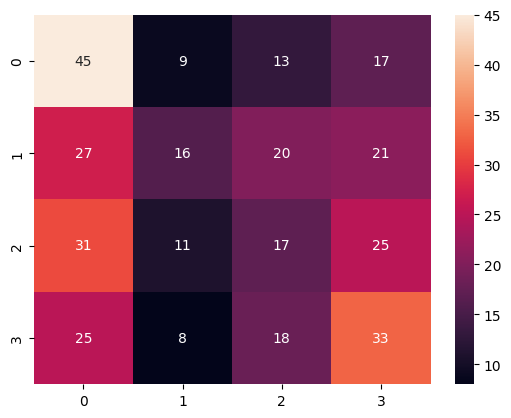

In [39]:
sns.heatmap(conf_matrix, annot=True)

In [40]:
accuracy(conf_matrix)

0.33035714285714285

In [41]:
precision(conf_matrix,0)
precision(conf_matrix,1)
precision(conf_matrix,2)
precision(conf_matrix,3)

0.34375

In [43]:
recall(conf_matrix,0)
recall(conf_matrix,1)
recall(conf_matrix,2)
recall(conf_matrix,3)

0.39285714285714285

In [44]:
specificity(conf_matrix,0)
specificity(conf_matrix,1)
specificity(conf_matrix,2)
specificity(conf_matrix,3)

0.75

In [46]:
f1(conf_matrix,0)
f1(conf_matrix,1)
f1(conf_matrix,2)
f1(conf_matrix,3)

0.3666666666666667

ROC-AUC Score (Class 0): 0.6031746031746033
ROC-AUC Score (Class 1): 0.5396825396825397
ROC-AUC Score (Class 2): 0.5
ROC-AUC Score (Class 3): 0.5714285714285715
Macro-average ROC-AUC Score: 0.5535714285714286


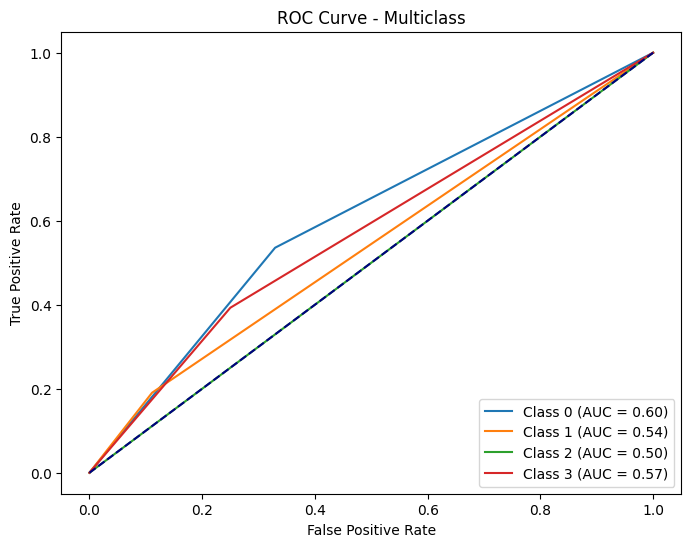

In [47]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.38857043693838056
Average Precision Score (Class 1): 0.3525005490143645
Average Precision Score (Class 2): 0.29972380340543436
Average Precision Score (Class 3): 0.3199115512808641
Macro-average Precision Score: 0.3401765851597609


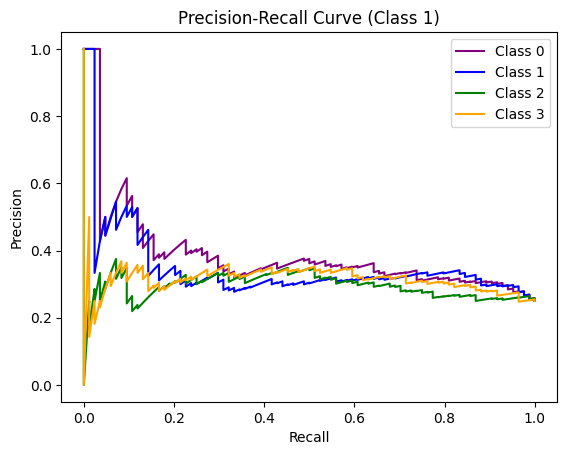

In [48]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

### Logistic Regression

In [51]:
lr = LogisticRegression(max_iter=1000)

In [52]:
# define search space
space = dict()

space['solver'] = ['newton-cg', 'lbfgs']
space['penalty'] = ['l2']

# Define search with additional parameter for multi-class
space['multi_class'] = ['multinomial']  # 'ovr' for binary, 'multinomial' for multi-class

# define search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
search = GridSearchCV(lr, space, scoring='accuracy', cv=cv)
result = search.fit(X=train_X_1, y=train_y_1)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.3651233570351217
Best Hyperparameters: {'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}


In [53]:
lr = LogisticRegression(multi_class='multinomial', penalty='l2', solver='newton-cg')

In [54]:
lr.fit(X=train_X_2, y=train_y_2)
preds = lr.predict(X=test_X_2)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = lr.predict_proba(test_X_2)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = lr.predict_proba(test_X_2)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[51, 13,  6, 14],
       [28, 26, 16, 14],
       [10, 20, 33, 21],
       [21, 12, 33, 18]])

<Axes: >

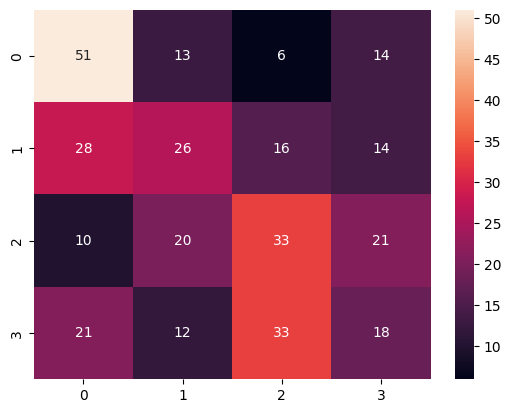

In [55]:
sns.heatmap(conf_matrix, annot=True)

In [56]:
accuracy(conf_matrix)

0.38095238095238093

In [57]:
precision(conf_matrix,0)
precision(conf_matrix,1)
precision(conf_matrix,2)
precision(conf_matrix,3)

0.26865671641791045

In [58]:
recall(conf_matrix,0)
recall(conf_matrix,1)
recall(conf_matrix,2)
recall(conf_matrix,3)

0.21428571428571427

In [59]:
specificity(conf_matrix,0)
specificity(conf_matrix,1)
specificity(conf_matrix,2)
specificity(conf_matrix,3)

0.8055555555555556

In [60]:
f1(conf_matrix,0)
f1(conf_matrix,1)
f1(conf_matrix,2)
f1(conf_matrix,3)

0.23841059602649003

ROC-AUC Score (Class 0): 0.6865079365079365
ROC-AUC Score (Class 1): 0.5654761904761905
ROC-AUC Score (Class 2): 0.5873015873015873
ROC-AUC Score (Class 3): 0.5099206349206349
Macro-average ROC-AUC Score: 0.5873015873015873


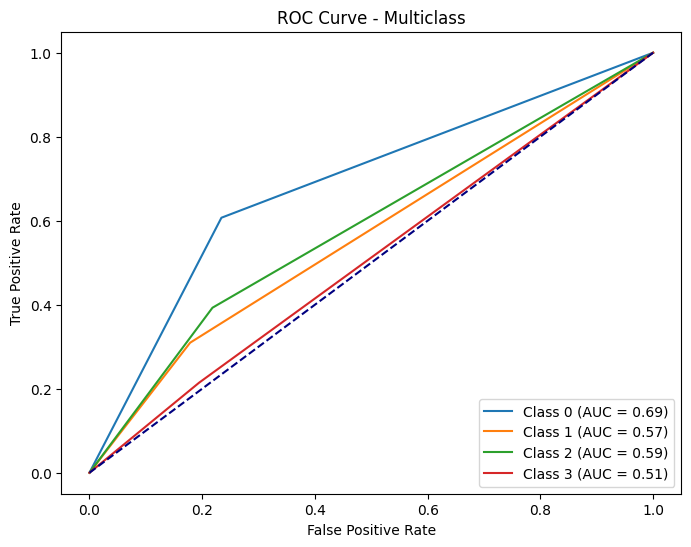

In [61]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.4949934074852134
Average Precision Score (Class 1): 0.3801640055362926
Average Precision Score (Class 2): 0.37808457047234034
Average Precision Score (Class 3): 0.3233332845081065
Macro-average Average Precision Score: 0.39414381700048823


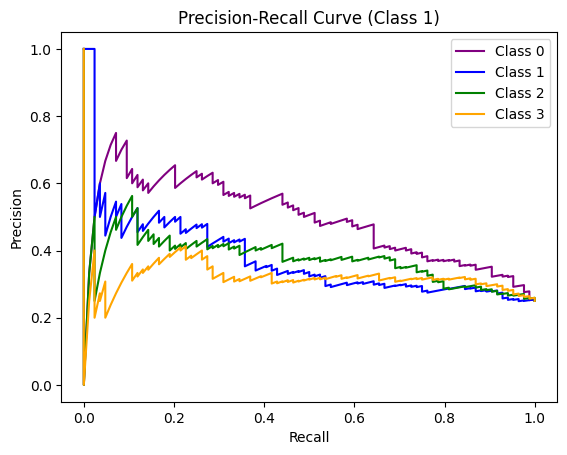

In [62]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

### K-nearest neighbors

In [63]:
kn = KNeighborsClassifier()

In [64]:
# define search space
space = dict()

space['n_neighbors'] = [1,3,5,8,10,15,19,20,21,22,23,24,25,26,27,28,29,30,35,40,45,50]
space['weights'] = ['uniform', 'distance']
space['algorithm'] = ['ball_tree', 'kd_tree', 'brute']
# space['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)

search = GridSearchCV(kn, space, scoring='accuracy', cv=cv)

# execute search
result = search.fit(X=train_X_4, y=train_y_4)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.43987287222581334
Best Hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 29, 'weights': 'distance'}


In [65]:
kn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=26, weights='distance')

In [66]:
kn.fit(X=train_X_4, y=train_y_4)
preds = kn.predict(X=test_X_4)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = kn.predict_proba(test_X_4)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = kn.predict_proba(test_X_4)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[64, 10,  2,  8],
       [21, 49,  8,  6],
       [15, 19, 31, 19],
       [24, 13, 17, 30]])

<Axes: >

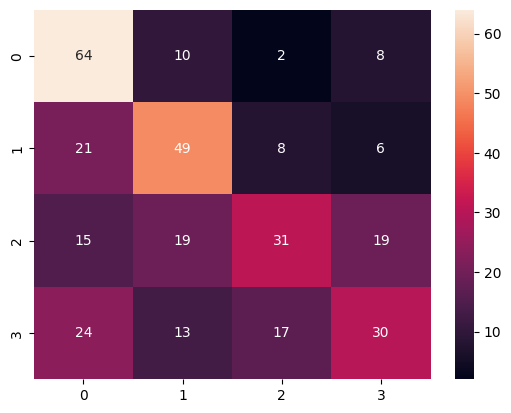

In [67]:
sns.heatmap(conf_matrix, annot=True)

In [68]:
accuracy(conf_matrix)

0.5178571428571429

In [69]:
precision(conf_matrix,0)
precision(conf_matrix,1)
precision(conf_matrix,2)
precision(conf_matrix,3)

0.47619047619047616

In [70]:
recall(conf_matrix,0)
recall(conf_matrix,1)
recall(conf_matrix,2)
recall(conf_matrix,3)

0.35714285714285715

In [71]:
specificity(conf_matrix,0)
specificity(conf_matrix,1)
specificity(conf_matrix,2)
specificity(conf_matrix,3)

0.8690476190476191

In [72]:
f1(conf_matrix,0)
f1(conf_matrix,1)
f1(conf_matrix,2)
f1(conf_matrix,3)

0.40816326530612246

ROC-AUC Score (Class 0): 0.7619047619047619
ROC-AUC Score (Class 1): 0.7083333333333335
ROC-AUC Score (Class 2): 0.6309523809523809
ROC-AUC Score (Class 3): 0.6130952380952381
Macro-average ROC-AUC Score: 0.6785714285714286


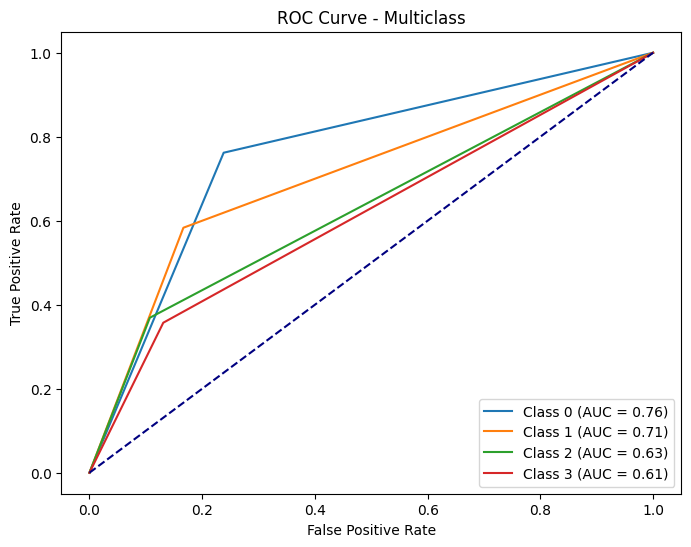

In [73]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.8190635941077311
Average Precision Score (Class 1): 0.6633278602844876
Average Precision Score (Class 2): 0.6084756746692161
Average Precision Score (Class 3): 0.44844422047952975
Macro-average Average Precision Score: 0.6348278373852411


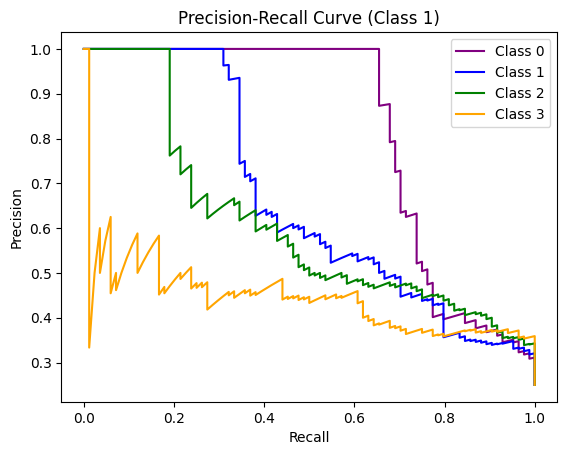

In [74]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

### Decision tree

In [75]:
dt = DecisionTreeClassifier(random_state=42)

In [76]:
# define search space
space = dict()

space['criterion'] = ['gini', 'entropy']
space['splitter'] = ['best', 'random']
space['max_depth'] = [1,2,3,4,5,8,10, 12, 15]
space['min_samples_split'] = [2,5,10,15,20,25,30,35,40]
space['min_samples_leaf'] = [1,2,3,4,5,8,10,12,15]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)

# define search
search = GridSearchCV(dt, space, scoring='accuracy', cv=cv)

# execute search
result = search.fit(X=train_X_1, y=train_y_1)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5146951088127558
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [77]:
dt = DecisionTreeClassifier(random_state=42,
                            criterion='gini',
                            max_depth=15,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            splitter='best')

In [78]:
dt.fit(X=train_X_4, y=train_y_4)
preds = dt.predict(X=test_X_4)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = dt.predict_proba(test_X_4)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = dt.predict_proba(test_X_4)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[64,  8,  7,  5],
       [13, 54, 11,  6],
       [ 8, 13, 40, 23],
       [15, 21, 16, 32]])

<Axes: >

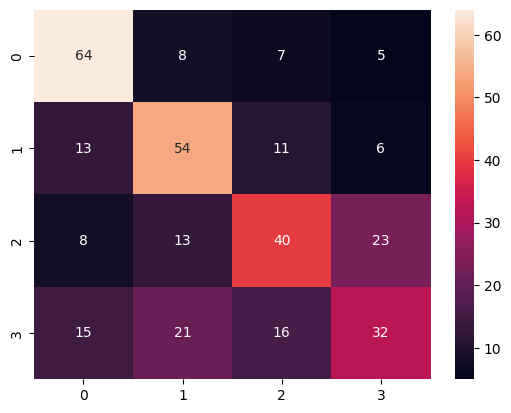

In [79]:
sns.heatmap(conf_matrix, annot=True)

In [80]:
accuracy(conf_matrix)

0.5654761904761905

In [81]:
precision(conf_matrix,0)
precision(conf_matrix,1)
precision(conf_matrix,2)
precision(conf_matrix,3)

0.48484848484848486

In [82]:
recall(conf_matrix,0)
recall(conf_matrix,1)
recall(conf_matrix,2)
recall(conf_matrix,3)

0.38095238095238093

In [83]:
specificity(conf_matrix,0)
specificity(conf_matrix,1)
specificity(conf_matrix,2)
specificity(conf_matrix,3)

0.8650793650793651

In [84]:
f1(conf_matrix,0)
f1(conf_matrix,1)
f1(conf_matrix,2)
f1(conf_matrix,3)

0.4266666666666667

ROC-AUC Score (Class 0): 0.8095238095238095
ROC-AUC Score (Class 1): 0.7380952380952381
ROC-AUC Score (Class 2): 0.6706349206349207
ROC-AUC Score (Class 3): 0.623015873015873
Macro-average ROC-AUC Score: 0.7103174603174603


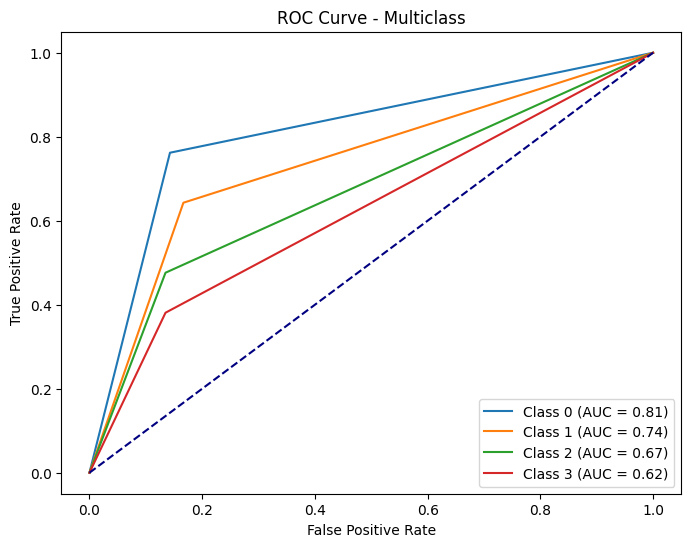

In [85]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.5564661654135339
Average Precision Score (Class 1): 0.4546992481203007
Average Precision Score (Class 2): 0.3993193959191162
Average Precision Score (Class 3): 0.34505772005772006
Macro-average Average Precision Score: 0.4388856323776677


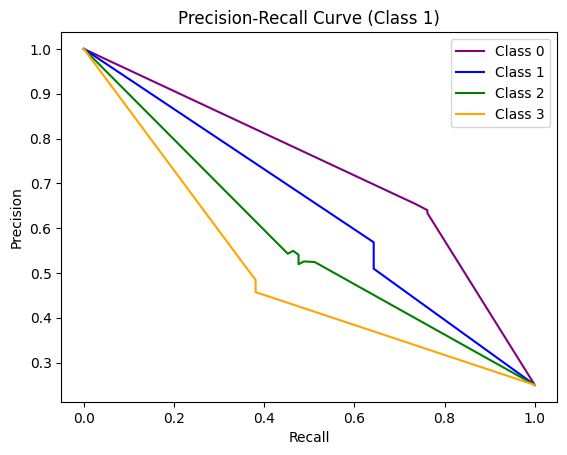

In [86]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

## Random forest

In [87]:
rf = RandomForestClassifier(random_state=42)

In [88]:
# define search space
space = dict()

space['criterion'] = ['gini', 'entropy']
space['n_estimators'] = [1,10,100,300]
space['max_depth'] = [1,5,15,20,25,30]
space['max_features'] = ['sqrt', 'log2']
search = GridSearchCV(rf, space, scoring='accuracy')

# execute search
result = search.fit(X=train_X_1, y=train_y_1)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6143207282913166
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'n_estimators': 300}


In [89]:
rf = RandomForestClassifier(random_state=42,
                            criterion='entropy',
                            max_depth=15,
                            max_features='log2',
                            n_estimators=300)

In [90]:
rf.fit(X=train_X_4, y=train_y_4)
preds = rf.predict(X=test_X_4)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = rf.predict_proba(test_X_4)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = rf.predict_proba(test_X_4)
conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[72,  4,  4,  4],
       [ 4, 63, 11,  6],
       [ 9,  9, 50, 16],
       [ 9, 22, 17, 36]])

<Axes: >

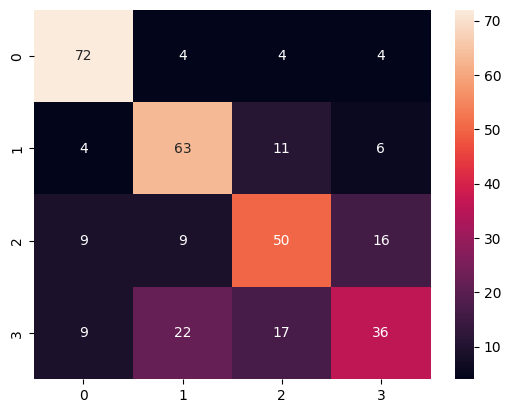

In [91]:
sns.heatmap(conf_matrix, annot=True)

In [92]:
accuracy(conf_matrix)

0.6577380952380952

In [93]:
precision(conf_matrix,0)
precision(conf_matrix,1)
precision(conf_matrix,2)
precision(conf_matrix,3)

0.5806451612903226

In [94]:
recall(conf_matrix,0)
recall(conf_matrix,1)
recall(conf_matrix,2)
recall(conf_matrix,3)

0.42857142857142855

In [95]:
specificity(conf_matrix,0)
specificity(conf_matrix,1)
specificity(conf_matrix,2)
specificity(conf_matrix,3)

0.8968253968253969

In [96]:
f1(conf_matrix,0)
f1(conf_matrix,1)
f1(conf_matrix,2)
f1(conf_matrix,3)

0.4931506849315069

ROC-AUC Score (Class 0): 0.884920634920635
ROC-AUC Score (Class 1): 0.8055555555555557
ROC-AUC Score (Class 2): 0.7341269841269842
ROC-AUC Score (Class 3): 0.6626984126984127
Macro-average ROC-AUC Score: 0.7718253968253969


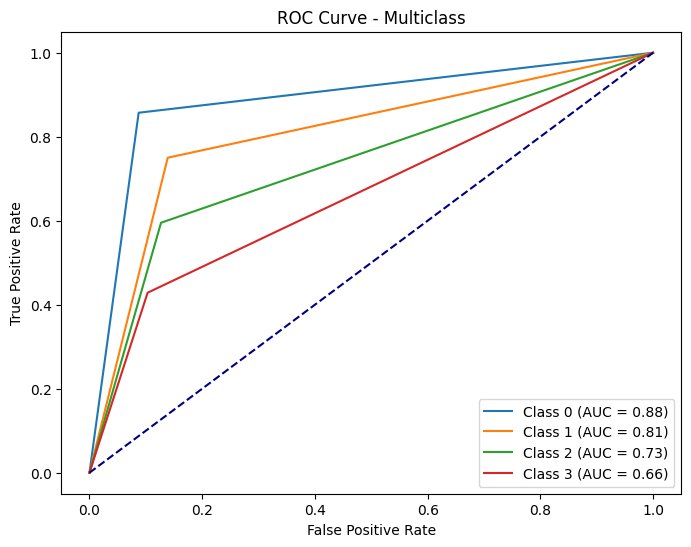

In [97]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.9149773888935194
Average Precision Score (Class 1): 0.8017754202868962
Average Precision Score (Class 2): 0.7113897814505827
Average Precision Score (Class 3): 0.606626479791115
Macro-average Average Precision Score: 0.7586922676055283


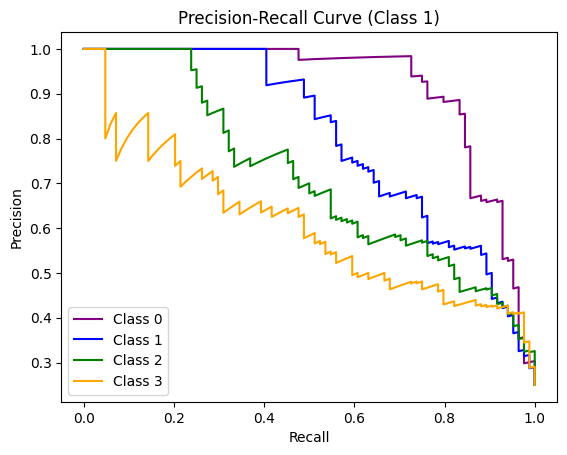

In [98]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

#XG BOOST

In [105]:
# Create an XGBoost classifier with OneVsRestClassifier
xgb = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4, eval_metric='mlogloss' , use_label_encoder =False))

In [106]:
xgb.fit(X=train_X_4, y=train_y_4)
preds = xgb.predict(X=test_X_4)
ananya_y_test = preds[:84]
arushi_y_test = preds[84:168]
ritika_y_test = preds[168:252]
shriya_y_test = preds[252:]
actual_values = [0] * 84 + [1] * 84 + [2] * 84 + [3] * 84
predicted_values = list(preds[:84]) + list(preds[84:168]) + list(preds[168:252]) + list(preds[252:])
preds_ = xgb.predict_proba(test_X_4)[:,1]

# Binarize the labels for roc_auc_score
actual_values_binary = label_binarize(actual_values, classes=[0, 1, 2, 3])
preds_binary = label_binarize(preds, classes=[0, 1, 2, 3])

# Binarize the labels for average_precision_score
preds_proba_binary = xgb.predict_proba(test_X_4)

conf_matrix = confusion_matrix(actual_values, predicted_values)
conf_matrix

array([[72,  4,  3,  5],
       [ 9, 57, 10,  8],
       [ 8, 10, 50, 16],
       [13, 16, 17, 38]])

<Axes: >

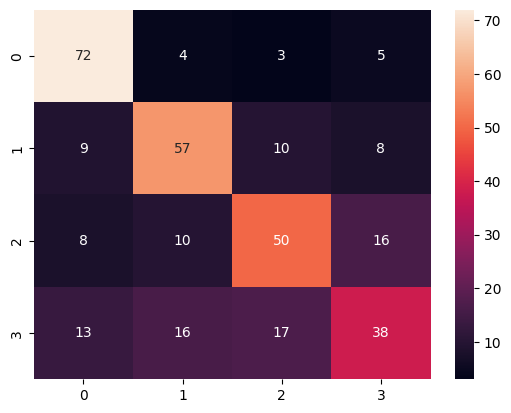

In [107]:
sns.heatmap(conf_matrix, annot=True)

In [108]:
accuracy(conf_matrix)

0.6458333333333334

In [109]:
precision(conf_matrix,0)
precision(conf_matrix,1)
precision(conf_matrix,2)
precision(conf_matrix,3)

0.5671641791044776

In [110]:
recall(conf_matrix,0)
recall(conf_matrix,1)
recall(conf_matrix,2)
recall(conf_matrix,3)

0.4523809523809524

In [111]:
specificity(conf_matrix,0)
specificity(conf_matrix,1)
specificity(conf_matrix,2)
specificity(conf_matrix,3)

0.8849206349206349

In [112]:
f1(conf_matrix,0)
f1(conf_matrix,1)
f1(conf_matrix,2)
f1(conf_matrix,3)

0.5033112582781457

ROC-AUC Score (Class 0): 0.869047619047619
ROC-AUC Score (Class 1): 0.7797619047619048
ROC-AUC Score (Class 2): 0.7380952380952381
ROC-AUC Score (Class 3): 0.6686507936507936
Macro-average ROC-AUC Score: 0.7638888888888888


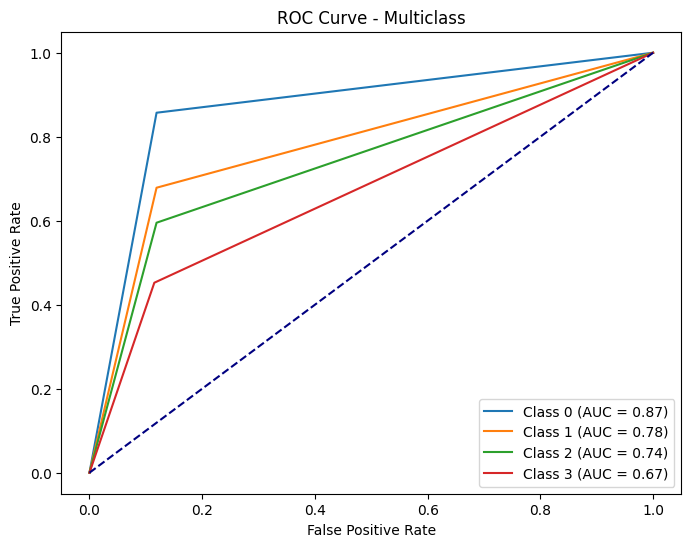

In [113]:
# Calculate ROC-AUC score for each class
roc_auc_scores = []
for i in range(4):
    roc_auc_scores.append(roc_auc_score(actual_values_binary[:, i], preds_binary[:, i]))

# Print individual ROC-AUC scores
for i in range(4):
    print(f'ROC-AUC Score (Class {i}): {roc_auc_scores[i]}')

# Print macro-average ROC-AUC score
macro_avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
print(f'Macro-average ROC-AUC Score: {macro_avg_roc_auc}')

# Plot ROC curve for one class (you can modify this to plot for all classes)
# false_positive_rate, true_positive_rate, _ = roc_curve(actual_values_binary[:, 1], preds_binary[:, 1])
# plot_roc('ROC Curve (Class 1)', false_positive_rate, true_positive_rate)

# ROC Curve
plot_roc_multiclass('ROC Curve - Multiclass', actual_values_binary, preds_binary, n_classes=4, save='roc_curve_multiclass.png')

Average Precision Score (Class 0): 0.8911753551633357
Average Precision Score (Class 1): 0.7203047964460467
Average Precision Score (Class 2): 0.6043887052067974
Average Precision Score (Class 3): 0.4688697934824104
Macro-average Average Precision Score: 0.6711846625746476


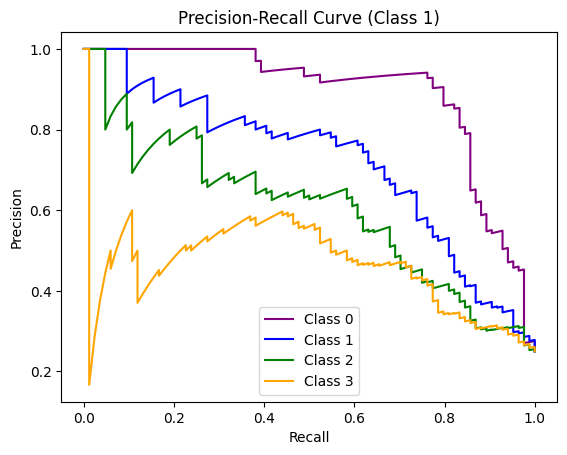

In [114]:
# Calculate average precision score for each class
average_precision_scores = []
for i in range(4):
    average_precision_scores.append(average_precision_score(actual_values_binary[:, i], preds_proba_binary[:, i]))

# Print individual average precision scores
for i in range(4):
    print(f'Average Precision Score (Class {i}): {average_precision_scores[i]}')

# Print macro-average average precision score
macro_avg_precision = sum(average_precision_scores) / len(average_precision_scores)
print(f'Macro-average Average Precision Score: {macro_avg_precision}')

# Plot precision-recall curve for one class (you can modify this to plot for all classes)
plot_pr_curve(actual_values_binary, preds_proba_binary, title='Precision-Recall Curve (Class 1)')

#### Compare predictions including song information

- A correct prediction for Ananya is 0, for Arushi is 1,for Ritika is 2, for Shriya is 3
- Songs are ordered in prediction probability, in other words, how confident the model was that the prediction was 1

In [126]:
Ananya_predictions = compare_predictions_Ananya(preds, preds_, actual_values, ananya_test_4, df_ananya_no_repeats_no_same_up_sampled)
Ananya_predictions = Ananya_predictions[['prediction', 'prediction_probability', 'name', 'artist', 'album']]
Ananya_predictions[Ananya_predictions["prediction"]==0].head()

,prediction,prediction_probability,name,artist,album
4,0,0.166773,NaN,Various Artists,NaN
5,0,0.164194,Framework,The Story So Far,What You Don't See
8,0,0.140371,Mt. Diablo,The Story So Far,Under Soil and Dirt
9,0,0.132347,Agust D,Agust D,Agust D
10,0,0.130998,Life Less Frightening,Rise Against,Siren Song Of The Counter-Culture


In [123]:
Arushi_predictions = compare_predictions_Arushi(preds, preds_, actual_values, arushi_test_4, df_arushi_no_repeats_no_same_up_sampled)
Arushi_predictions = Arushi_predictions[['prediction', 'prediction_probability', 'name', 'artist', 'album']]
Arushi_predictions[Arushi_predictions["prediction"]==1].head()

,prediction,prediction_probability,name,artist,album
24,1,0.379734,Ashes,Stellar,Ashes
26,1,0.408204,Everchanging - Acoustic,Rise Against,Long Forgotten Songs: B-Sides & Covers 2000-2013
28,1,0.452440,Listen to Her Heart,Tom Petty and the Heartbreakers,You're Gonna Get It!
29,1,0.452440,Listen to Her Heart,Tom Petty and the Heartbreakers,You're Gonna Get It!
31,1,0.509499,Bullfight,A Day To Remember,Bad Vibrations (Deluxe Edition)


In [124]:
Ritika_predictions = compare_predictions_Ritika(preds, preds_, actual_values, ritika_test_4, df_ritika_no_repeats_no_same_up_sampled)
Ritika_predictions = Ritika_predictions[['prediction', 'prediction_probability', 'name', 'artist', 'album']]
Ritika_predictions[Ritika_predictions["prediction"]==2].head()

,prediction,prediction_probability,name,artist,album
10,2,0.394745,긴 밤 (feat. GIRIBOY),Seori,긴 밤 (feat. GIRIBOY)
11,2,0.365789,Crying Over You ◐ (feat. RM & BEKA),HONNE,Crying Over You ◐ (feat. RM & BEKA)
16,2,0.248037,Sour Grapes,LE SSERAFIM,FEARLESS
19,2,0.219924,Rollercoaster,Jonas Brothers,Happiness Begins
22,2,0.183895,Trust,Jonas Brothers,Happiness Begins


In [125]:
Shriya_predictions = compare_predictions_Shriya(preds, preds_, actual_values, shriya_test_4, df_shriya_no_repeats_no_same)
Shriya_predictions = Shriya_predictions[['prediction', 'prediction_probability', 'name', 'artist', 'album']]
Shriya_predictions[Shriya_predictions["prediction"]==3].head()

,prediction,prediction_probability,name,artist,album
2,3,0.000955,Hard To Say Goodbye,Washed Out,Mister Mellow
5,3,0.004145,Wurli,Dominic Fike,What Could Possibly Go Wrong
7,3,0.005591,The Warning,Hot Chip,The Warning
9,3,0.008651,Save Some Love,HANDSOME,Save Some Love
10,3,0.009255,my tears ricochet,Taylor Swift,folklore
